# MTH4000 Programming in Python I - Lecture 3
Module Organisers: Dr Matthew Lewis and Prof. Thomas Prellberg

### Indexing (Recap)

Last week, we were introduced to the sequence types: lists, tuples and ranges.  We saw that individual elements inside these types could be returned to us via *indexing*, which can be achieved by writing the name of the sequence object, followed by the index of the desired value written inside a pair of square brackets.

In [1]:
fibonacci=[1,1,2,3,5,8,13,21,34,55,89,144,233]
print(fibonacci[0]) # indexing starts at ZERO !!!
print(fibonacci[4])
print(fibonacci[-1]) # last element of the list
print(fibonacci[len(fibonacci)-1])

1
5
233
233


### Slicing

As well as returning a single element inside a list, it is also possible to return a sublist containing all the elements inside the list that fall between a certain pair of indices.  Such a sublist is usually referred to as a *slice*, and the operation used to obtain them, *slicing*.

A slice can be returned by writing the name of a list, followed by a pair of square brackets containing two indices separated by a colon.  The first index is the start index, the index of the first element to be *included* in the slice.  The second index is the stop index, the index of the first element past the start index to be *excluded* from the slice.  (Compare this notation with the start and stop arguments of the `range` function).

In [2]:
print(fibonacci)
print(fibonacci[4:7])
print(fibonacci[4:5])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[5, 8, 13]
[5]


For example, the slice (sublist) `fibonacci[4:7]` consists of `fibonacci[4]`, `fibonacci[5]` and `fibonacci[6]`, but not `fibonacci[7]`, and the number of entries in this slice is equal to $7-4=3$.

Consistent with this, a slice with both indices being equal is an empty list.

In [3]:
print(fibonacci[5:5])
print(len([]))
print(fibonacci[5:4])

[]
0
[]


We can also omit the start index, and Python will return the slice obtained by starting from index $0$.  Similarly, we can omit the stop index, and Python will return the slice obtained by using a stop index equal to the final index of the list.

In [4]:
print(fibonacci[:7])
print(fibonacci[4:])
print(fibonacci[:]) # we can even do both at the same time to return the entire list

[1, 1, 2, 3, 5, 8, 13]
[5, 8, 13, 21, 34, 55, 89, 144, 233]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]


As above, we can also use negative indices. For example, the slice `fibonacci[3:-2]` starts at  the entry with index $3$ and omits the final two entries.

In [5]:
print(fibonacci[3:-2])
print(fibonacci[-10:7])
print(fibonacci[-10:-3])

[3, 5, 8, 13, 21, 34, 55, 89]
[3, 5, 8, 13]
[3, 5, 8, 13, 21, 34, 55]


Slicing with `[-n,:]` gives the last $n$ entries.

In [6]:
fibonacci[-4:]

[55, 89, 144, 233]

Finally, by giving a third argument, we can skip over entries.  (Again, compare this with the "step size" parameter in the `range` function).  To omit every second entry in the list, we can write the following:

In [7]:
print(fibonacci)
print(fibonacci[0:8:2])
print(fibonacci[1:13:2])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[1, 2, 5, 13]
[1, 3, 8, 21, 55, 144]


Slicing works also with tuples:

In [8]:
today=(2023,'February',5)
print(today)

(2023, 'February', 5)


In [9]:
print(today[0])
print(today[0:1])
print(today[1:])

2023
(2023,)
('February', 5)


## List Comprehensions

So far, we have seen that we can create lists in Python by writing them out by hand, which is inefficient, or by using the ranges, which is efficient but restricted to equally-spaced integers. What if we wanted to generate a list of the first 71 square numbers? There is a nice construction in Python called [list comprehensions](http://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) that allows us to do just this, as you have already seen in the labs. We will now go over this in more detail.

In [10]:
print([n**2 for n in range (1,72)])

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041]


We have just generated a list using the syntax "\[*expression* **for** *item* **in** *iterable*\]", where 

* *iterable* is a `range`, `list`, `tuple`, or any other kind of sequence object
* *item* is a variable name which sequentially takes each value in the iterable
* *expression* is a Python expression which is evaluated for each value of *item*

It's clear that the list that's returned to us from this code is the value of *expression* for each value of *item*, when *item* is given each of the values inside *iterable*.  In terms of the objects given in the example above, the elements returned to the list are the values of `n**2` for each value of `n` given by `range(1,72)`.

Since `range(1,72)` contains all integers between $1$ and $71$ (inclusive), the final list contains the values $1^2$, $2^2$, $3^2$, ..., $71^2$.

Note that the expression can be a lot more complicated than squaring:

In [11]:
print([(n**5+3*n**3+21*n**2-17*n-34)**0.5 for n in range(2,7)])

[8.48528137423857, 20.688160865577203, 38.07886552931954, 62.49799996799898, 95.09994742374992]


As mentioned above, it can involve evaluating functions:

In [22]:
import math

pi_vals = [(math.pi * n)/4 for n in range(9)]

print([math.sin(n) for n in pi_vals])

[0.0, 0.7071067811865475, 1.0, 0.7071067811865476, 1.2246467991473532e-16, -0.7071067811865475, -1.0, -0.7071067811865477, -2.4492935982947064e-16]


There may even be more than one function in the same expression:

In [16]:
print([math.sin(n)**2+math.cos(n)**2 for n in range(-2,3)])

[1.0, 1.0, 1.0, 1.0, 1.0]


On the other hand, the expression may not depend on the variable at all:

In [17]:
print([1.0 for n in range(-2,3)])

[1.0, 1.0, 1.0, 1.0, 1.0]


#### Local (dummy) variables

Note that in the above list comprehensions, I have chosen many different names for the variable. These variables are called *local* (or *dummy*) variables.  They are only defined within the scope of the list comprehension, and are forgotten the moment the list has been computed. Their name does not matter at all, it is just a place holder.

In [18]:
[a for a in range(3)],[_2 for _2 in range(3)],\
[some_name_I_dont_care_about for some_name_I_dont_care_about in range(3)]

([0, 1, 2], [0, 1, 2], [0, 1, 2])

Neither `a`, `_2`, or `some_name_I_dont_care_about` are known after the previous code has been run

In [19]:
# After the first list comprehension was computed, the variable _2 was forgotten, so this call will be invalid.
# _2

#### More examples

Let's compare the following three ways of generating a list of the first 20 integers. We can generate this list by hand, create the range object and convert it to a list, or use list comprehension.

In [20]:
list1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print(list1)
list2=list(range(1,21))
print(list2)
list3=[n for n in range(1,21)]
print(list3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


However, the list comprehension syntax is the most useful if we can explicitly express the $n$-th element of a list. Here are some more examples.

In [23]:
print([n%3 for n in range(21)])
print([k**k for k in range(1,10)])
print([math.factorial(i) for i in range(3,20,2)])
print([1 for n in range(30)])

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
[1, 4, 27, 256, 3125, 46656, 823543, 16777216, 387420489]
[6, 120, 5040, 362880, 39916800, 6227020800, 1307674368000, 355687428096000, 121645100408832000]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


The *iterable* does not need to be a range object, but can be a list.

In [24]:
list0=[n**2 for n in range(11)]
print(list0)
list1=[n**0.5 for n in list0]
print(list1)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


There is also a great deal of variation allowed in our choice of iterable.  Up until this point, our iterables have all been ranges.  This need not be the case.

In [25]:
primes=[2,3,5,7,11,13]

print([p**2 for p in primes])

[4, 9, 25, 49, 121, 169]


In this last example, we constructed a list `primes` and created a list comprehension that iterates over this list.  We could instead have written this list *inside* the comprehension itself:

In [26]:
print([p**2 for p in [2,3,5,7,11,13]])

[4, 9, 25, 49, 121, 169]


This is useful if you wish to check a certain property holds for a fixed (and finite) set of values.  For instance, are $1$, $\frac{1}{2}(1+\sqrt{5})$ and $\frac{1}{2}(1-\sqrt{5})$ all solutions of the equation $x^3-2x^2+1=0$?

In [27]:
print([x**3-2*(x**2)+1 for x in [1,(1+5**0.5)/2,(1-5**0.5)/2]])

[0, 0.0, -2.220446049250313e-16]


Pay close attention how Python evaluates these three roots: 
- in the first case, it can be done in integer arithmetic, so the result is simply the integer $0$
- in the second case, the evaluation is done in floating point, so the result is also floating point, in this case $0.0$
- additionally, in the third case, finite precision can result in rounding errors, and we get $-2.2\times 10^{-16}$

Note that so far, our iterables have contained only integers and floats.  This need not be the case, we could have strings:

In [28]:
print(['hello '+word for word in ["world","there","from the other side"]])

['hello world', 'hello there', 'hello from the other side']


We could even have an iterable be a list of lists:

In [29]:
print([ len(l) for l in [ ['see','Spot'] , ['see','Spot','run'] , ['run','Spot','run'] ] ])

[2, 3, 3]


Finally, a note about the variable names that we use for the items inside list comprehensions.  It should be clear that changing the variable inside the list comprehension does not affect the returned list (as long as we're careful to also change the expression accordingly):

In [34]:
print([n%3 for n in range(21)])
print([k%3 for k in range(21)])
print([some_ridiculously_long_and_inappropriate_variable_name%3\
       for some_ridiculously_long_and_inappropriate_variable_name in range(21)])

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]


Let me repeat again that the variables that we define inside list comprehensions are only remembered by Python for the duration over which the list is being computed.  Once the list has been returned to us, the variable name is lost.  For instance, notice that we only defined the value `n` in some of the above list comprehensions.  Nowhere in this document has it been defined outside of this context.  Indeed, if we attempt to call it:

In [35]:
# n
# this doesn't work!

We find that Python doesn't remember it ever being defined and returns an error.  This is all to do with a concept called the *scope* of a variable, and we will see something similar when we discuss user-defined functions next week.

For now, note that this has the advantage that you can confidently use the same variable in different list comprehensions without having to worry about the lists changing upon being re-computed.

In [36]:
[n for n in range(1,5)]

[1, 2, 3, 4]

In [37]:
[n for n in ['one','two','three','four']]

['one', 'two', 'three', 'four']

### Generators

We (very!) briefly mention another data type that exists in Python: generators.  A generator behaves very similarly to a range, in that it contains nothing more than a start value and a rule for computing subsequent values.  The key difference is that generators allow us to construct specific rules for computing the next value of a sequence, rather than being forced into an arithmetic progression, as with ranges.

We won't be dealing with generators at all throughout this course, so there is no need to remember any of that.  So why do we mention it here?  Two reasons:

1.  Generators are quite popular in the Python community, and you may very well see them mentioned in online posts that you encounter while searching the web for function documentation.  In that case, it may prove helpful to have a vague idea of what's being discussed.


2.  If you accidentally type (for example) `(2*i for i in range(5))` instead of `[2*i for i in range(5)]`, you construct a generator instead of a list.

In [ ]:
(2*i for i in range(5))

You may already have noticed that while coding, we sometimes get as output `< ... >`. This happens because of how Python stores data internally. You may, for example, have gotten output such as `[<matplotlib.lines.Line2D at 0x124255d90>]` when plotting.

We can see that Python is not overly helpful when calling generators, only telling us that the above is a 'generator object'.  This again highlights the similarity between generators and ranges:

In [ ]:
range(5)

In both cases, the values cannot simply be listed, because Python has not computed them yet.  Python memorises only the initial value, and a rule for computing the next one.  In the range object, the rule is simply to add one.  For the generator above, the rule is provided in the generator comprehension (like a list comprehension, but with round brackets).

We can convert a generator to a list by using the built-in `list` function.

In [ ]:
list((2*i for i in range(5)))

Alternatively, if you wrote the list comprehension in round brackets because you wished to create a tuple, you can instead use the built-in `tuple` function:

In [ ]:
tuple((2*i for i in range(5)))

The computations above are similar to when we used the `list` and `tuple` functions on a range:

In [ ]:
range(5)

In [ ]:
list(range(5))

In [ ]:
tuple(range(5))

In each of these cases, Python simply iterates through every value in the generator, and appends them to a newly constructed list/tuple.

In [40]:
*(x for x in range(10)), # tuple comprehension, by unpacking generator

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

### Lists and Plotting

Now that we have discussed lists in Python, we shall briefly revisit plotting. 

In [41]:
import matplotlib.pyplot as plt
import numpy as np

Lets assume we want to plot a function defined only for integer values, such as Euler's totient function $\varphi(n)$, which counts the number of positive integers $m$ less than a given positive integer $n$ that are relatively prime to it, i.e. $gcd(n,m)=1$:

$$\varphi(n)=\left|\left\{m\in\mathbb N: m<n, gcd(n,m)=1\right\}\right|$$

A bit of googling shows that the the totient function is defined in the module `sympy`, so we simply load that function.

In [42]:
import sympy as sp

We can compute it for a few examples. For example, $12$ is coprime to $1,5,7,11$ (but not to $2,3,4,6,8,9,10$) so that $\varphi(12)$ should be $4$.

In [43]:
sp.totient(12)

4

We can use a list to give out $\varphi(n)$ for a range of values of $n$.

In [44]:
print([sp.totient(n) for n in range(1,101)])

[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24, 12, 36, 18, 24, 16, 40, 12, 42, 20, 24, 22, 46, 16, 42, 20, 32, 24, 52, 18, 40, 24, 36, 28, 58, 16, 60, 30, 36, 32, 48, 20, 66, 32, 44, 24, 70, 24, 72, 36, 40, 36, 60, 24, 78, 32, 54, 40, 82, 24, 64, 42, 56, 40, 88, 24, 72, 44, 60, 46, 72, 32, 96, 42, 60, 40]


This doesn't seem to tell us much. To really appreciate this function, we should try plotting it. The plotting function accepts lists of $x$ and $y$ coordinates.

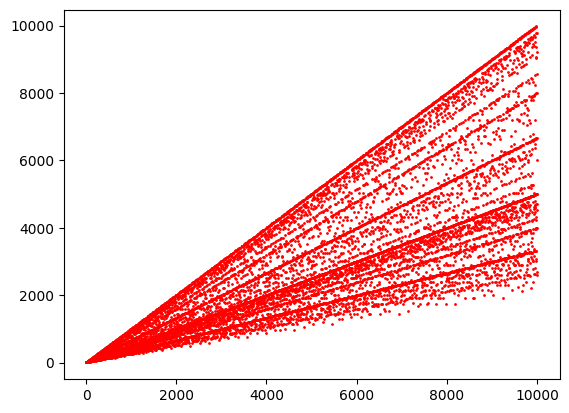

In [46]:
x=list(range(1,10001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=1)
plt.show()

Note that I have used some nice formatting shortcut here: 'ro' means red circles as markers and no lines. For details, and help on everything pyplot related, see https://matplotlib.org/tutorials/introductory/pyplot.html.

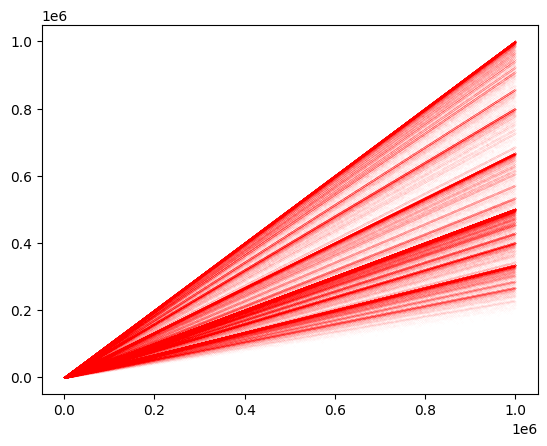

In [49]:
x=list(range(1,1000001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=0.01)
plt.show()

This shows that the behaviour of $\varphi(n)$ seems to show some structure but is also intriguingly complicated. You can read up on this function [here](https://en.wikipedia.org/wiki/Euler's_totient_function).

### Points and Plotting

Lets assume we are given a sequence of points with $x$ and $y$ coordinates, say for a circle.

In [50]:
circle_coordinates=[(np.cos(np.pi/180*phi),np.sin(np.pi/180*phi)) for phi in range(360)]

To practice slicing, lets look at angles that are multiples of 90 degrees.

In [51]:
circle_coordinates[0:360:90]

[(1.0, 0.0),
 (6.123233995736766e-17, 1.0),
 (-1.0, 1.2246467991473532e-16),
 (-1.8369701987210297e-16, -1.0)]

How can we plot the points? Unfortunately we cannot simply plot tuples, we need to separate this into $x$ and $y$ coordinates.

In [52]:
x_coord = [point[0] for point in circle_coordinates]
y_coord = [point[1] for point in circle_coordinates]

Now we are ready for plotting.

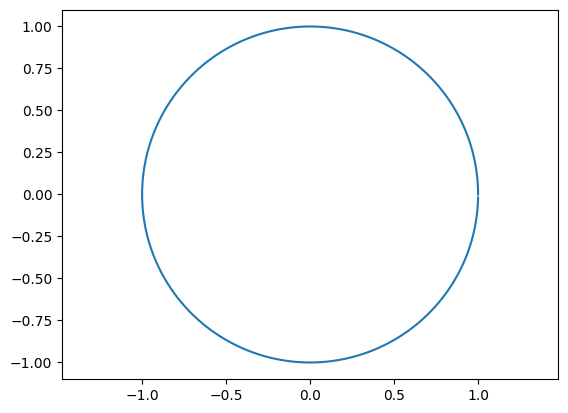

In [53]:
plt.plot(x_coord,y_coord)
# the following line can be found searching Google for "matplotlib axes equal"
plt.gca().axis('equal')
plt.show()

Finally, lets turn this into a clock by adding hour and minute markers (using appropriate slicing)

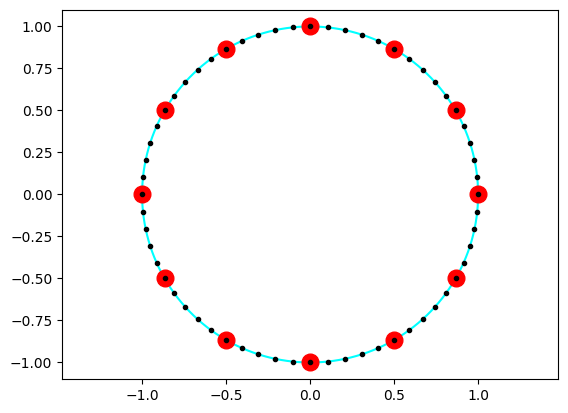

In [54]:
plt.plot(x_coord,y_coord,color='cyan')
plt.plot(x_coord[0:360:30],y_coord[0:360:30],'or',markersize=12)
plt.plot(x_coord[0:360:6],y_coord[0:360:6],'.k')
plt.gca().axis('equal')
plt.show()

And if you have fun with this sort of stuff, try adding more details...

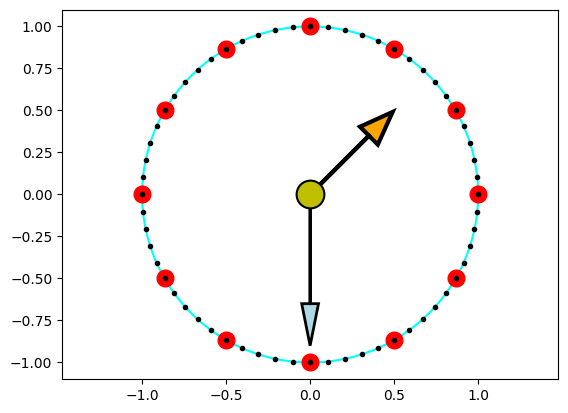

In [55]:
plt.plot(x_coord,y_coord,color='cyan')
plt.plot(x_coord[0:360:30],y_coord[0:360:30],'or',markersize=12)
plt.plot(x_coord[0:360:6],y_coord[0:360:6],'.k')
plt.gca().axis('equal')
# some more googling suggests the following code for some clock hands
plt.arrow(0,0,0.35,0.35,head_width=0.15, head_length=0.2, linewidth=3, fc='orange', ec='black')
plt.arrow(0,0,0,-0.65,head_width=0.1, head_length=0.25, linewidth=2, fc='lightblue', ec='black')
plt.plot([0],[0],'oy',markersize=20,markeredgecolor='black',markeredgewidth=1.5)
plt.show()

## Functions

We discussed sequence types and how to use these. We encountered situations where we repeated the same calculation for all entries of a sequence. Using the same calculation repeatedly for different input values is efficiently done with *functions*.

More importantly, as you will perhaps have noticed, all fancy things we have done so far such as graph plotting has been done with the help of functions. We will first discuss existing built-in functions in more detail. Then we will describe a really important part of programming, which is writing your own functions. In fact, **you will write many functions** yourself, in exercises, tests, and the final project, so you really will have to come to terms with this.

### Built-in Functions for Sequences

Python has useful [built-in functions](http://docs.python.org/3/library/functions.html) for working with sequences. You have already seen in the tutorial that we can compute the length of a list, sum up all the entries in a list of numbers, or determine their minimum and maximum values.

In [56]:
list0=[j for j in range(1,41,2)]
print(list0)
print('this list has', len(list0), 'entries')
print('the smallest value is', min(list0), 'and the largest value is', max(list0))
print('the sum of all the entries is', sum(list0))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
this list has 20 entries
the smallest value is 1 and the largest value is 39
the sum of all the entries is 400


We can also sort the entries in a list.

In [57]:
list0=[j*(-1)**j for j in range(1,10,1)]
print(list0)
print(sorted(list0))

[-1, 2, -3, 4, -5, 6, -7, 8, -9]
[-9, -7, -5, -3, -1, 2, 4, 6, 8]


### Further Built-in Functions

We already encountered a selection of other built-in functions, such as `type()` and `print()`. The following is a list of frequently used [built-in functions](http://docs.python.org/3.3/library/functions.html) in these lectures.

| Function | Description|
|----------|------------|
|`print(object)`| print `object` to output |
|`type(object)`| return the type of `object` |
|`abs(x)`|	return the absolute value of `x` (or magnitude if `x` is complex)|
|`int(x)`|	return the integer constructed from float `x` by truncating decimal|
|`len(sequence)`|	return the length of the `sequence`|
|`sum(sequence)`|	return the sum of the entries of `sequence`|
|`max(sequence)`|	return the maximum value in `sequence`|
|`min(sequence)`|	return the minimum value in `sequence`|
|`range(a,b,step)`|	return the range object of integers from `a` to `b` (exclusive) by `step`|
|`list(sequence)`|	return a list constructed from `sequence`|
|`sorted(sequence)`|	return the sorted list from the items in `sequence`|
|`reversed(`sequence`)`|	return the reversed iterator object from the items in `sequence`|
|`enumerate(sequence)`|	return the enumerate object constructed from `sequence`|
|`zip(a,b)`|	return an iterator that aggregates items from sequences `a` and `b`|

Some of the functions we have not encountered yet. `abs()` computes the absolute value (or magnitude) of a number. Note that the absolute value of an integer is returned as an integer, but that the absolute values of floats and complex numbers are returned as floats.

In [58]:
print(abs(-3))
print(abs(-3.0))
print(abs(3+4j))

3
3.0
5.0


We have learned that division of integers produces floats. What if we want to convert a float result back to integer? We can do this either with `int()`. Note that the function `int()` truncates towards zero.

In [59]:
print(int(-1.414))
print(int(1.414))

-1
1


We encountered several functions involving sequences, such as `range()`, `list()`, and `sorted()`. The function `reversed()` does what you would expect it to do, but note that `reversed()` does not return a list, so we need to use `list()` if we want the output to be a list. This is similar to having to convert a range object to a list.

In [60]:
print(reversed([1,5,8,-10]))
print(list(reversed([1,5,8,-10])))
print(list(reversed(range(1,11))))

[-10, 8, 5, 1]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


Note that this can also be achieved by slicing appropriately.

In [61]:
[1,5,8,-10][::-1]

[-10, 8, 5, 1]

The function `zip()` combines sequences into a list of pairs.

In [62]:
list_a=[3,55,1,2]
list_b=[4,5,2,-7]
print(zip(list_a,list_b))
print(list(zip(list_a,list_b)))

[(3, 4), (55, 5), (1, 2), (2, -7)]


In [63]:
print(list(zip(x_coord,y_coord))[:5])
print(circle_coordinates[:5])

[(1.0, 0.0), (0.9998476951563913, 0.01745240643728351), (0.9993908270190958, 0.03489949670250097), (0.9986295347545738, 0.052335956242943835), (0.9975640502598242, 0.0697564737441253)]
[(1.0, 0.0), (0.9998476951563913, 0.01745240643728351), (0.9993908270190958, 0.03489949670250097), (0.9986295347545738, 0.052335956242943835), (0.9975640502598242, 0.0697564737441253)]


Finally, the function `enumerate()` enumerates a sequence by zipping it with `range(len(sequence))`.

In [64]:
print(list_a)
range_a=range(len(list_a))
print(list(zip(range_a,list_a)))
print(list(enumerate(list_a)))
print(enumerate(list_a))

[3, 55, 1, 2]
[(0, 3), (1, 55), (2, 1), (3, 2)]
[(0, 3), (1, 55), (2, 1), (3, 2)]


## Conclusion and Outlook

In this lecture we have discussed sequences and built-in functions, ending with a brief introduction to user-defined functions.

In [65]:
(1, 2, 3, 4)

(1, 2, 3, 4)

In [69]:
tuple(i for i in range(1,5, 2))

(1, 3)